In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

In [3]:
#### load data
# with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
#     omc_bin = pickle.load(f)   

# #### load data
# with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
#     omc_countN = pickle.load(f)

#### load data
with open(in_path +'M194_M220_ACA_bin4.pkl', 'rb') as f:
    acc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_ACA_countN4.pkl', 'rb') as f:
    acc_countN = pickle.load(f)

# Data Processing

In [4]:
# initial processing
# bin processing
acc_clean = [clean_up_data(df, to_drop = ['OB', 'OMCi', 'OMCc', 'HIP'], inj_site="ACAi") for df in acc_bin]
acc_type = [sort_by_celltype(df, it_areas=["ACAc", "AUD", "STR"]) for df in acc_clean]
acc_preprocess = dfs_preprocess_counts(acc_type, drop=["ACAi", "type"]) # normalize by dataset median

# countN processing
acc_cleanN = [clean_up_data(df, to_drop = ['OB', 'OMCi', 'OMCc', 'HIP'], inj_site="ACAi") for df in acc_countN]
acc_typeN = [sort_by_celltype(df, it_areas=["ACAc", "AUD", "STR"]) for df in acc_cleanN]
acc_preprocessN = dfs_preprocess_counts(acc_typeN, drop=["ACAi", "type"]) # normalize by dataset median



# Heatmaps

## individual animal

In [39]:
col_order = ["ACAc", "AUD", "STR", 'TH',  "AMY", 'HY', 'SNr', 'SCm', 'PG', 'PAG',
             'BS', 'ACAi', 'type']


In [54]:
acc_preprocess[10][acc_preprocess[10]['type']=="CT"]

,ACAc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS,ACAi,type
2342,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT
2343,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT
2344,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT
2345,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT
2346,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT
2347,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT
2348,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT
2349,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT
2350,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT
2351,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CT


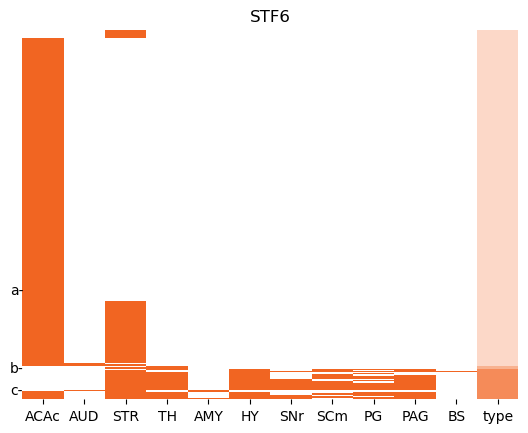

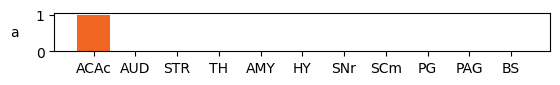

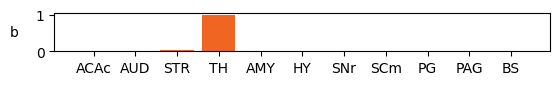

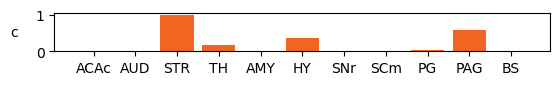

In [58]:
# plot STF6 only, mice[10]
i=10
sort_order = ['type', 'ACAc', 'AUD',  'STR', 'TH', 'AMY', 'HY', 'SNr', 'SCm', 'PG', 'PAG',
       'BS']
neurons = {"a":1800, "b":2342, "c":2495}

sorted_heatmap(acc_preprocess[i][col_order], sort_by=sort_order, sort_ascend=True, title=mice[i], drop=["ACAi"],
               label_neurons=neurons)


plt.savefig(out_path+"ACA_heatmap_mapseq_STF6.svg", dpi=300, bbox_inches="tight")
plt.show()

for key in neurons.keys():
       # single_neuron_bar(acc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plot = acc_preprocessN[i][col_order]
       single_neuron_bar(plot, neurons[key], label=key, sort_by=[], drop=["ACAi", "type"])
       plt.savefig(out_path+"ACA_heatmap_mapseq_STF6"+"neuron_"+key+".svg", dpi=300, bbox_inches="tight")
       plt.show()

## n=1000 species summary

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


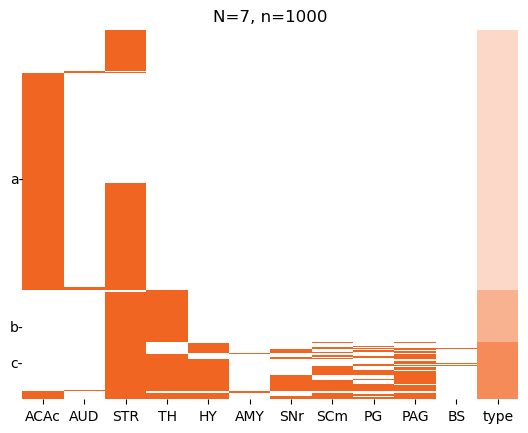

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


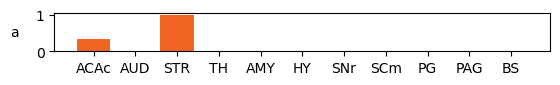

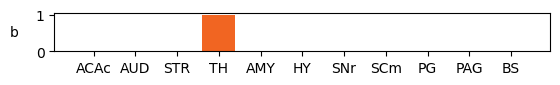

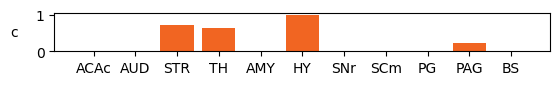

In [60]:
# plot 1000 neurons sampled from all only
stidx = [i for i in range(len(species)) if species[i]=="STeg"]
acc_st = np.take(acc_preprocess, stidx) # just get steg from list
plot_st = pd.concat(acc_st).reset_index(drop=True)


neurons = {"a":400, "b":800, "c":900}

idx, fig = sorted_heatmap(plot_st, sort_by=sort_order, title="N=7, n=1000", drop=["ACAi"],
               nsample=1000, label_neurons=neurons)
plt.savefig(out_path+"ACC_heatmap_mapseq_ST_1000.svg", dpi=300, bbox_inches="tight")
plt.show(fig)


stidx = [i for i in range(len(species)) if species[i]=="STeg"]
accN_st = np.take(acc_preprocessN, stidx) # just get steg from list
plotN_st = pd.concat(accN_st).reset_index(drop=True)
plotN = plotN_st.loc[idx,:].reset_index(drop=True)
for key in neurons.keys():
       # single_neuron_bar(acc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plot = plotN[col_order]
       single_neuron_bar(plot, neurons[key], label=key, sort_by=[], drop=["ACAi", "type"])
       plt.savefig(out_path+"ACC_heatmap_mapseq_ST_1000_neuron_"+key+".svg", dpi=300, bbox_inches="tight")
       plt.show()

# umap/clustering???

# Polar plots

In [61]:
proportion_polar_plot(acc_type, title="All Cells")
plt.show()

KeyError: "['OMCi'] not found in axis"

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(valu

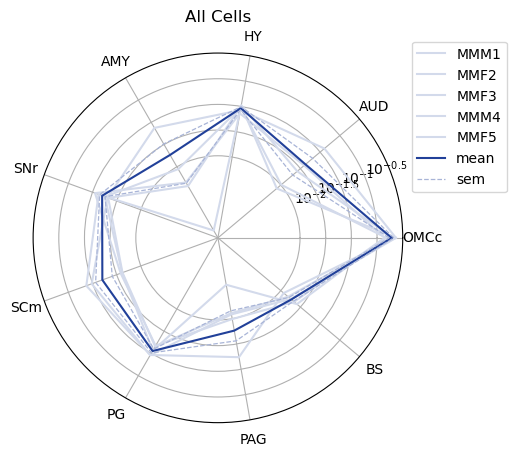

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set

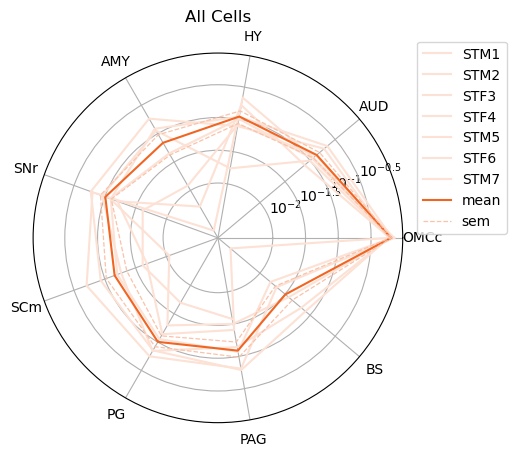

In [62]:
acc_mm = [acc_type[i] for i in range(len(acc_type)) if species[i]=="MMus"]
meta_mm = metadata[metadata["species"]=="MMus"].reset_index(drop=True)

proportion_polar_plot(acc_mm, title="All Cells", plot_individuals=True, meta=meta_mm)
plt.show()

acc_st = [acc_type[i] for i in range(len(acc_type)) if species[i]=="STeg"]
meta_st = metadata[metadata["species"]=="STeg"].reset_index(drop=True)

proportion_polar_plot(acc_st, title="All Cells", plot_individuals=True, meta=meta_st)
plt.show()

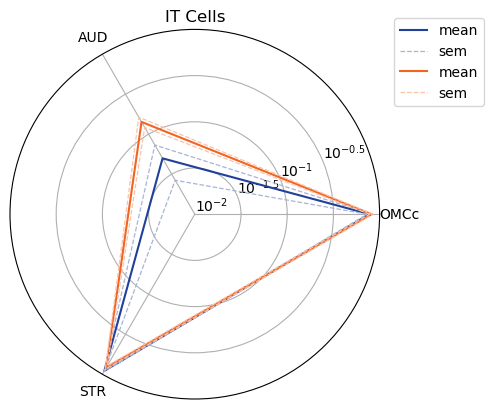

In [53]:
acc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in acc_type]
proportion_polar_plot(acc_it, title="IT Cells", cell_type="IT")
plt.show()


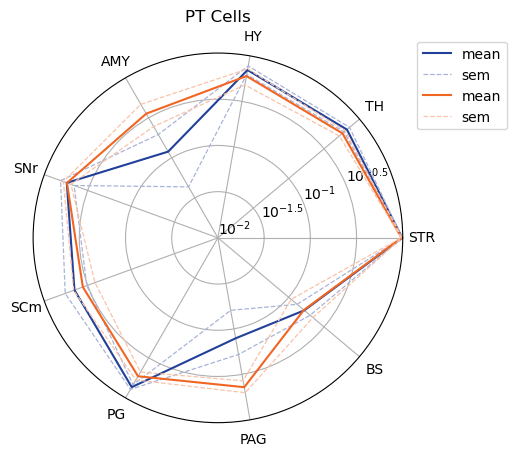

In [54]:
acc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in acc_type]
proportion_polar_plot(acc_pt, title="PT Cells", cell_type="PT")
plt.show()


# Dot Plots

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


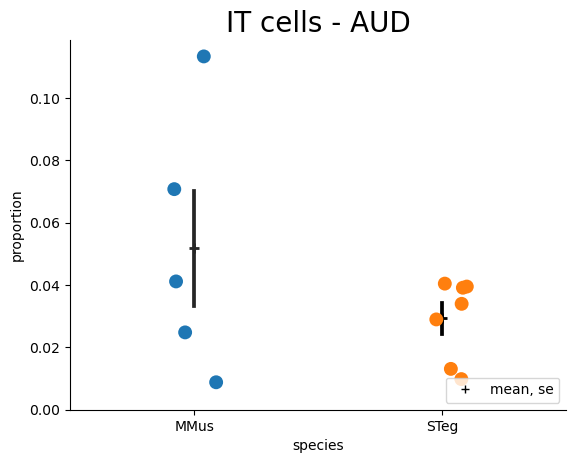

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


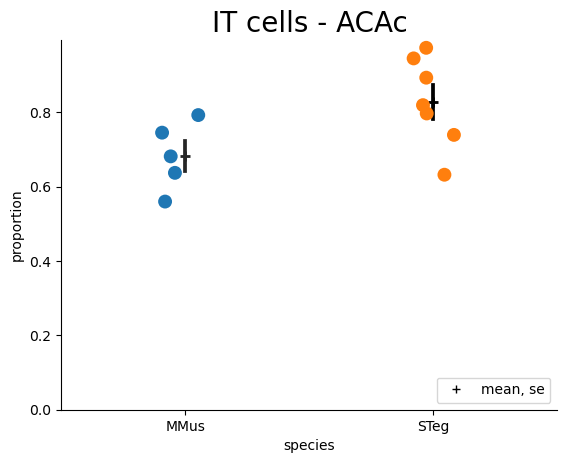

In [64]:
# IT
acc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in acc_type]
plot_df = dfs_to_proportions(acc_it, cell_type="IT", drop=["ACAi","type"], inj_site="ACAi")

# AUD
area_proportion_dot_plot(plot_df, "AUD", title="IT cells - AUD")
plt.savefig(out_path+"ACA_AUD_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# accc
area_proportion_dot_plot(plot_df, "ACAc", title="IT cells - ACAc")
plt.savefig(out_path+"ACA_ACAc_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


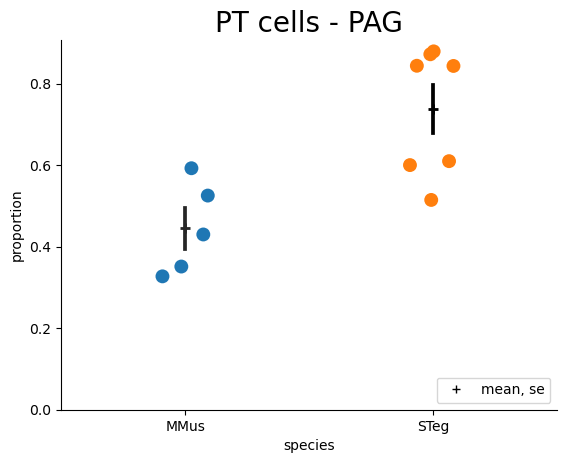

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


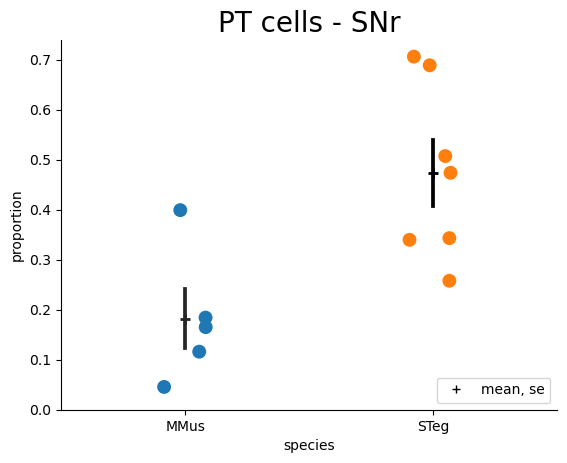

In [65]:

acc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in acc_type]
plot_df = dfs_to_proportions(acc_pt, cell_type="PT", drop=["ACAi","type"], inj_site="ACAi")

# PAG
area_proportion_dot_plot(plot_df, "PAG", title="PT cells - PAG")
plt.savefig(out_path+"ACC_PAG_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
area_proportion_dot_plot(plot_df, "SNr", title="PT cells - SNr")
plt.savefig(out_path+"ACC_SNr_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

## Add down Sampled lab mouse

In [68]:
# processing
acc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in acc_type]
acc_it_prop = dfs_to_proportions(acc_it, cell_type="IT", drop=["ACAi","type"], inj_site="ACAi")

mm_it_sim = sample_mm_all(acc_it)
mm_it_sim_prop = dfs_to_proportions(mm_it_sim, cell_type="IT", drop=["ACAi","type"], inj_site="ACAi")
mm_it_sim_prop['species'] = "MMus_down_sampled"


acc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in acc_type]
acc_pt_prop = dfs_to_proportions(acc_pt, cell_type="PT", drop=["ACAi","type"], inj_site="ACAi")

mm_pt_sim = sample_mm_all(acc_pt)
mm_pt_sim_prop = dfs_to_proportions(mm_pt_sim, cell_type="PT", drop=["ACAi","type"], inj_site="ACAi")
mm_pt_sim_prop['species'] = "MMus_down_sampled"


plot_it = pd.concat([acc_it_prop, mm_it_sim_prop])
plot_pt = pd.concat([acc_pt_prop, mm_pt_sim_prop])

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

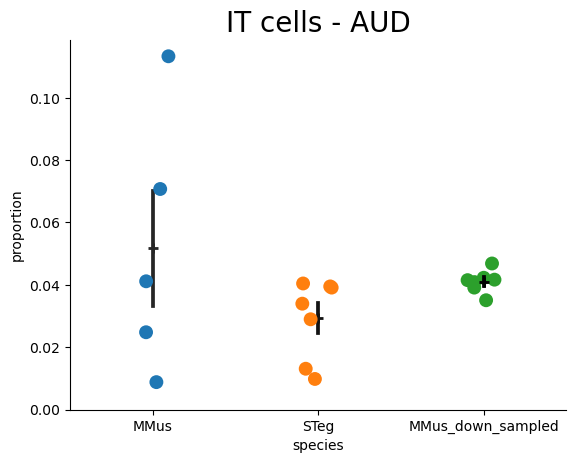

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

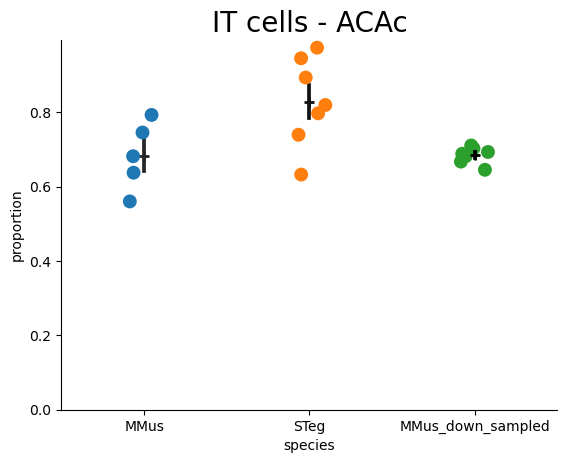

In [70]:
# AUD
area_proportion_dot_plot(plot_it, "AUD", title="IT cells - AUD", add_legend=False)
# plt.savefig(out_path+"ACA_AUD_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# ACAc
area_proportion_dot_plot(plot_it, "ACAc", title="IT cells - ACAc", add_legend=False)
# plt.savefig(out_path+"ACA_ACAc_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

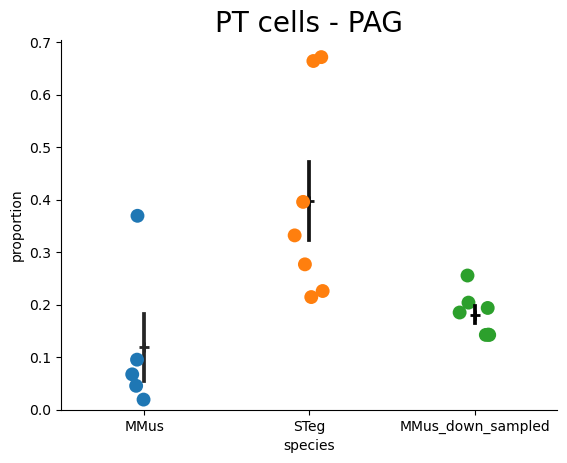

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

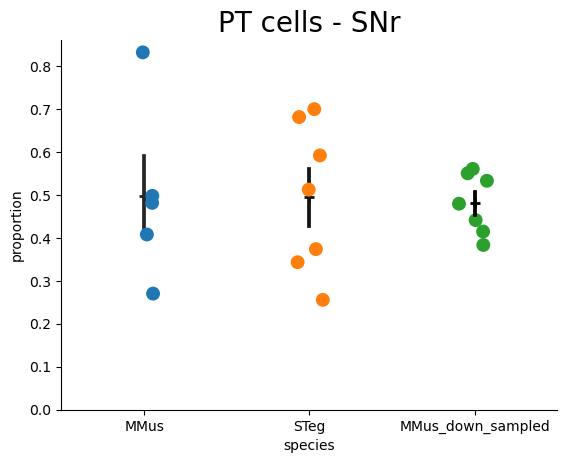

In [223]:
# PAG
area_proportion_dot_plot(plot_pt, "PAG", title="PT cells - PAG", add_legend=False)
# plt.savefig(out_path+"ACA_AUD_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
area_proportion_dot_plot(plot_pt, "SNr", title="PT cells - SNr", add_legend=False)
# plt.savefig(out_path+"ACA_ACAc_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# Estimated error

## MMus x MMus_down Sampled

In [71]:
# processing
acc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in acc_type]
acc_it_prop = dfs_to_proportions(acc_it, cell_type="IT", drop=["ACAi","type"], inj_site="ACAi")

mm_it_sim = sample_mm_all(acc_it)
mm_it_sim_prop = dfs_to_proportions(mm_it_sim, cell_type="IT", drop=["ACAi","type"], inj_site="ACAi")
mm_it_sim_prop['species'] = "MMus_down_sampled"


acc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in acc_type]
acc_pt_prop = dfs_to_proportions(acc_pt, cell_type="PT", drop=["ACAi","type"], inj_site="ACAi")

mm_pt_sim = sample_mm_all(acc_pt)
mm_pt_sim_prop = dfs_to_proportions(mm_pt_sim, cell_type="PT", drop=["ACAi","type"], inj_site="ACAi")
mm_pt_sim_prop['species'] = "MMus_down_sampled"


sim_it_prop = pd.concat([acc_it_prop, mm_it_sim_prop])
sim_pt_prop = pd.concat([acc_pt_prop, mm_pt_sim_prop])

sim_it_prop['type'] = "IT"
sim_pt_prop['type'] = "PT"

# get rid of STR from pt
sim_pt_prop = sim_pt_prop[sim_pt_prop['area'] != "STR"]

sim_prop = pd.concat([sim_it_prop, sim_pt_prop]).reset_index(drop=True)
sim_prop

,area,proportion,mice,species,dataset,type
0,ACAc,0.745616,MMM1,MMus,M194,IT
1,AUD,0.024801,MMM1,MMus,M194,IT
2,STR,0.804606,MMM1,MMus,M194,IT
3,ACAc,0.681832,MMF2,MMus,M194,IT
4,AUD,0.041144,MMF2,MMus,M194,IT
...,...,...,...,...,...,...
204,SNr,0.193772,MMM4,MMus_down_sampled,M220,PT
205,SCm,0.564014,MMM4,MMus_down_sampled,M220,PT
206,PG,0.269896,MMM4,MMus_down_sampled,M220,PT
207,PAG,0.494810,MMM4,MMus_down_sampled,M220,PT


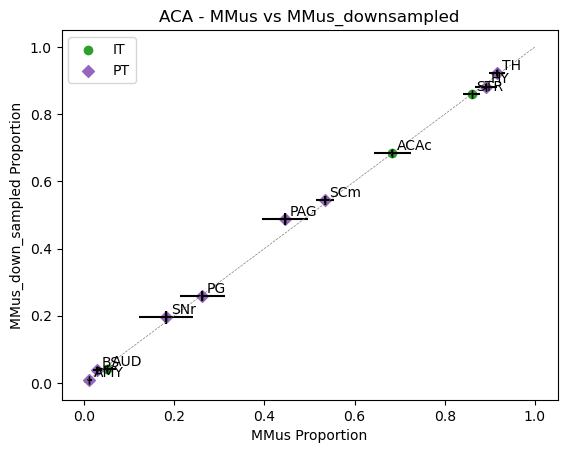

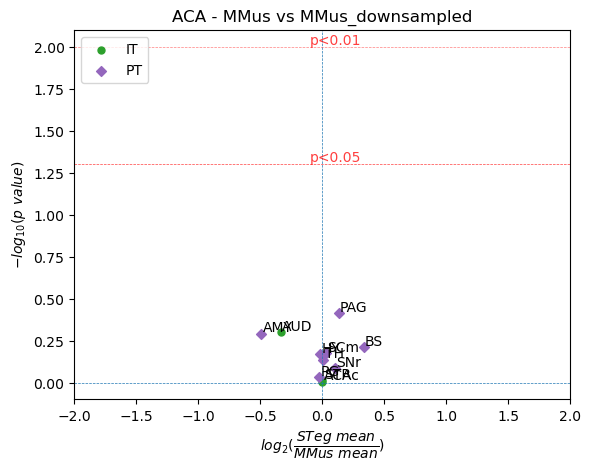

In [72]:
plot = stvmm_calc_stats(sim_prop, species=["STeg", "MMus", "MMus_down_sampled"])


# scatter
stvmm_area_scatter_type(plot, title="ACA - MMus vs MMus_downsampled", x="MMus", y="MMus_down_sampled")
# plt.savefig(out_path+"ACA_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

# volcano
plot = stvmm_calc_ttest(sim_prop, sp1="MMus", sp2="MMus_down_sampled")
plot_volcano(plot, title="ACA - MMus vs MMus_downsampled", shape='type')
plt.show()


## MMus_downsample x STeg

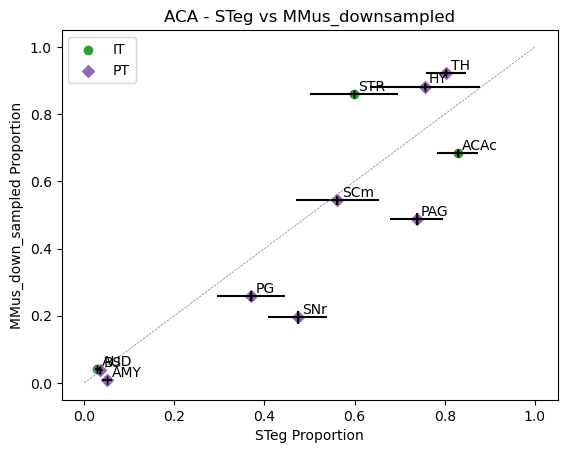

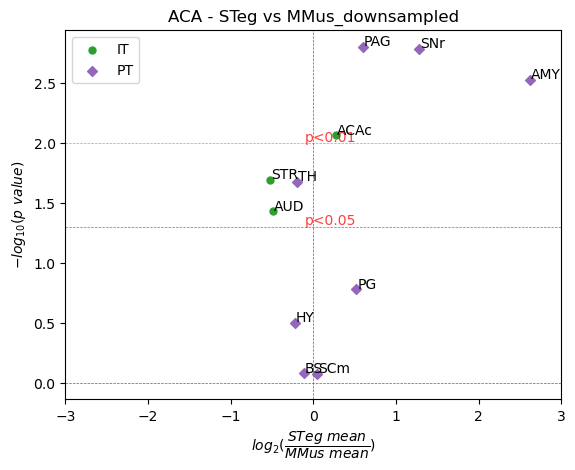

In [73]:
plot = stvmm_calc_stats(sim_prop, species=["STeg", "MMus", "MMus_down_sampled"])


# scatter
stvmm_area_scatter_type(plot, title="ACA - STeg vs MMus_downsampled", x="STeg", y="MMus_down_sampled")
# plt.savefig(out_path+"ACA_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

# volcano
plot = stvmm_calc_ttest(sim_prop, sp1="MMus_down_sampled", sp2="STeg")
plot_volcano(plot, title="ACA - STeg vs MMus_downsampled", shape='type', xlim=(-3,3))
plt.show()

## MMus x MMus

In [79]:
acc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in acc_type]
acc_it_prop = dfs_to_proportions(acc_it, cell_type="IT", drop=["ACAi","type"], inj_site="ACAi")
acc_it_prop['type'] = "IT"
acc_pt = [df[df["type"]=="PT"].drop(["type", "STR"], axis=1) for df in acc_type]
acc_pt_prop = dfs_to_proportions(acc_pt, cell_type="PT", drop=["ACAi","type"], inj_site="ACAi")
acc_pt_prop['type'] = "PT"


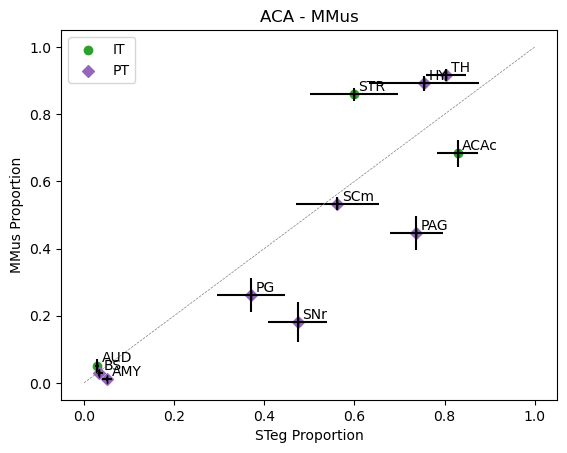

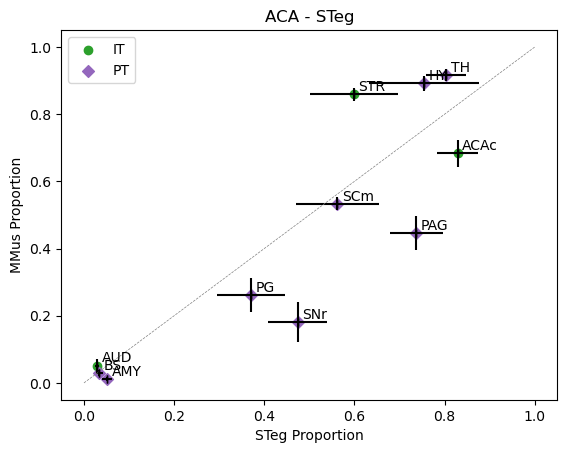

In [81]:

it_stats = stvmm_calc_stats(acc_it_prop)
pt_stats = stvmm_calc_stats(acc_pt_prop)
stats = pd.concat([it_stats, pt_stats])


stvmm_area_scatter_type(stats, title="ACA - MMus", species="MMus")
# plt.savefig(out_path+"ACA_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

stvmm_area_scatter_type(stats, title="ACA - STeg", species="STeg")
# plt.savefig(out_path+"ACA_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

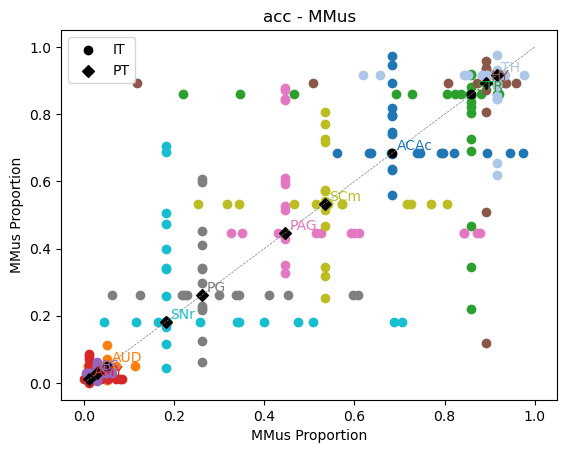

In [82]:
# acc_it_prop['type'] = "IT"
# acc_pt_prop['type'] = "PT"
acc_prop = pd.concat([acc_it_prop, acc_pt_prop])


stvmm_area_scatter_individ(stats.reset_index(), acc_prop, title="acc - MMus", species="MMus")
plt.show()

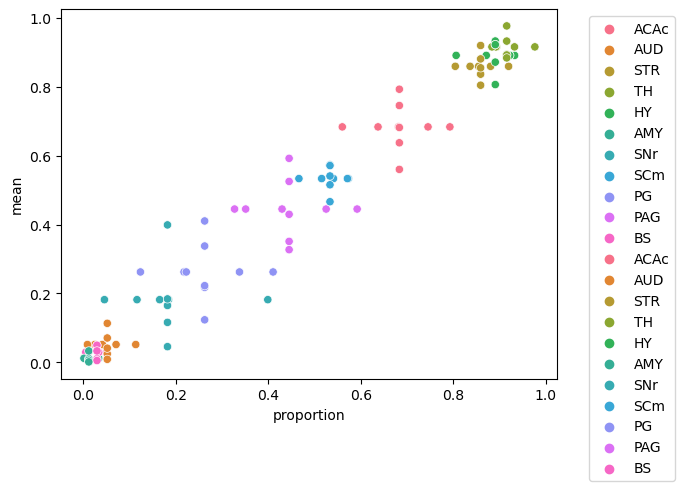

In [83]:
stats_mm = stats[stats['species']=="MMus"].reset_index()
acc_prop_mm = acc_prop[acc_prop['species']=="MMus"].reset_index(drop=True)

plot = acc_prop_mm.copy()
for i in range(plot.shape[0]):
    area = plot.loc[i,'area']
    ar_row = stats_mm[stats_mm['area']==area].reset_index(drop=True)
    plot.loc[i,'mean'] = ar_row.loc[0,'mean']

sns.scatterplot(plot, x='proportion', y='mean', hue='area')
sns.scatterplot(plot, x='mean', y='proportion', hue='area')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

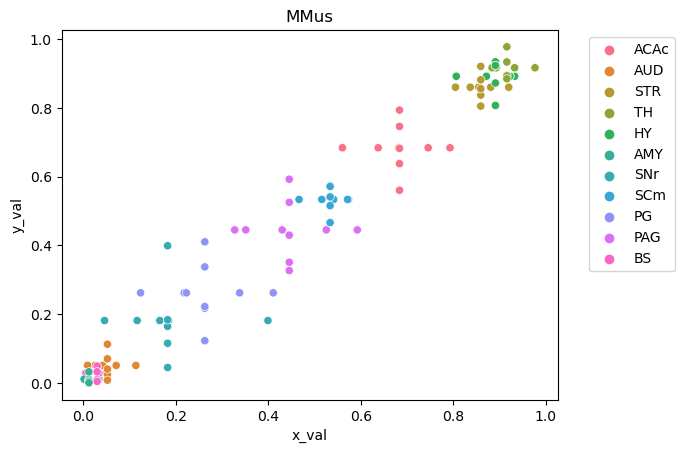

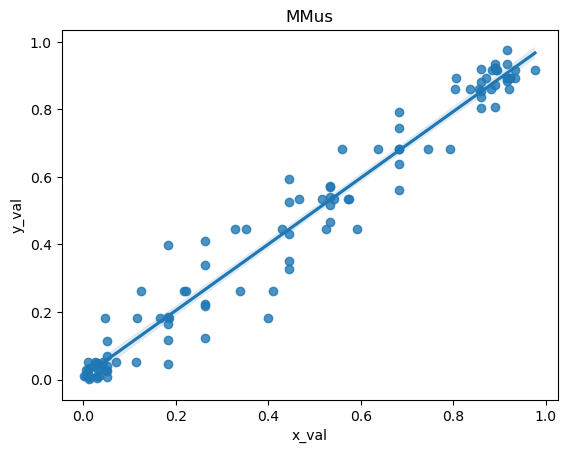

In [84]:
stats_mm = stats[stats['species']=="MMus"].reset_index()
acc_prop_mm = acc_prop[acc_prop['species']=="MMus"].reset_index(drop=True)

plot = acc_prop_mm.copy()
for i in range(plot.shape[0]):
    area = plot.loc[i,'area']
    ar_row = stats_mm[stats_mm['area']==area].reset_index(drop=True)
    plot.loc[i,'mean'] = ar_row.loc[0,'mean']


# plot regression
plot_reg = pd.DataFrame()
int1 = pd.DataFrame({'x_val':plot['proportion'], 'y_val':plot['mean'], 'area':plot['area'], 
                     'type':plot['type'], 'mice':plot['mice']})
int2 = pd.DataFrame({'x_val':plot['mean'], 'y_val':plot['proportion'], 'area':plot['area'], 
                     'type':plot['type'], 'mice':plot['mice']})

plot_reg = pd.concat([int1, int2])
sns.scatterplot(plot_reg, x='x_val', y='y_val', hue='area')
plt.title("MMus")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

sns.regplot(plot_reg, x='x_val', y='y_val')
plt.title("MMus")
plt.show()

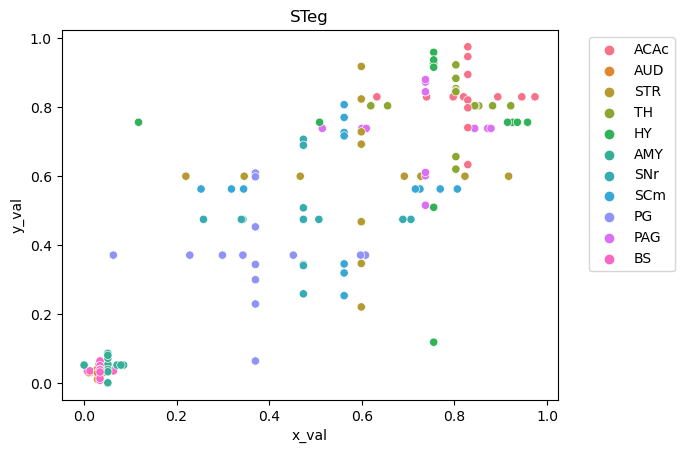

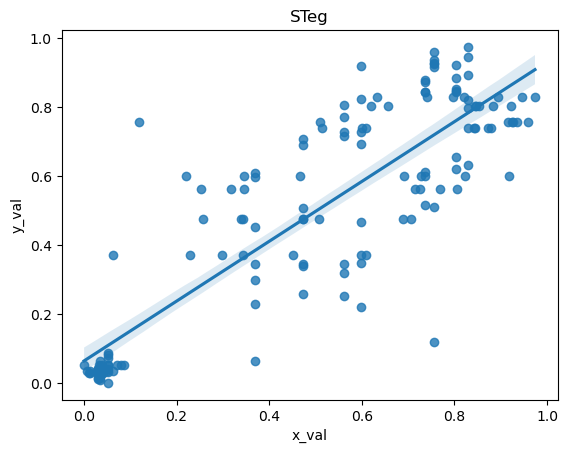

In [85]:
stats_st = stats[stats['species']=="STeg"].reset_index()
acc_prop_st = acc_prop[acc_prop['species']=="STeg"].reset_index(drop=True)

plot = acc_prop_st.copy()
for i in range(plot.shape[0]):
    area = plot.loc[i,'area']
    ar_row = stats_st[stats_st['area']==area].reset_index(drop=True)
    plot.loc[i,'mean'] = ar_row.loc[0,'mean']

# plot regression
plot_reg = pd.DataFrame()
int1 = pd.DataFrame({'x_val':plot['proportion'], 'y_val':plot['mean'], 'area':plot['area'], 
                     'type':plot['type'], 'mice':plot['mice']})
int2 = pd.DataFrame({'x_val':plot['mean'], 'y_val':plot['proportion'], 'area':plot['area'], 
                     'type':plot['type'], 'mice':plot['mice']})

plot_reg = pd.concat([int1, int2])
sns.scatterplot(plot_reg, x='x_val', y='y_val', hue='area')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("STeg")
plt.show()

sns.regplot(plot_reg, x='x_val', y='y_val')
plt.title("STeg")
plt.show()

# Intra vs. Inter comparisons

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

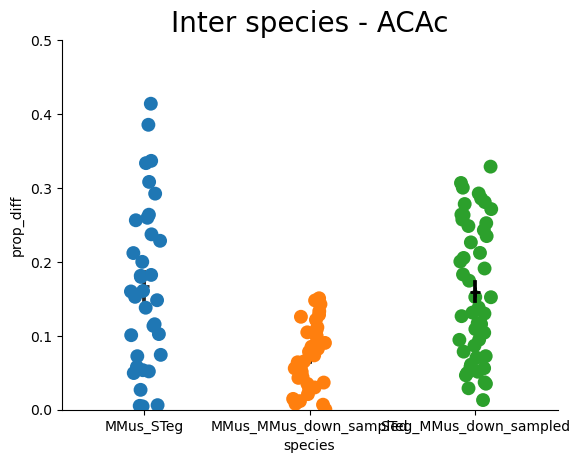

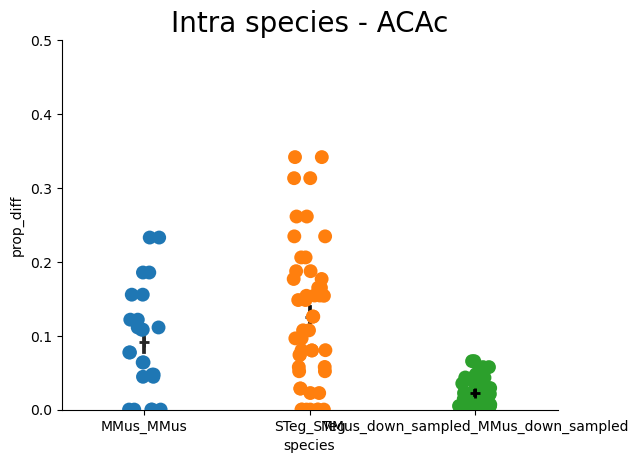

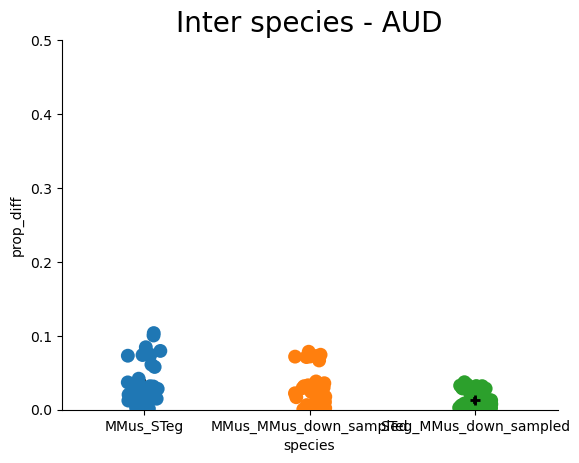

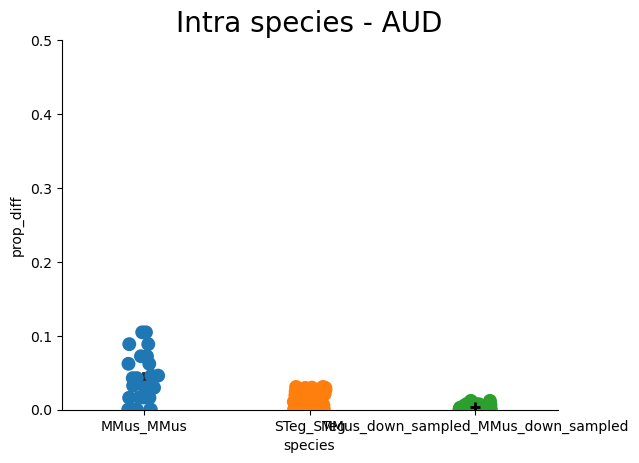

In [89]:
d1 = proportion_comparisons(plot_it, species1="MMus", species2="STeg", label="inter")
d2 = proportion_comparisons(plot_it, species1="MMus", species2="MMus_down_sampled", label="inter")
d3 = proportion_comparisons(plot_it, species1="STeg", species2="MMus_down_sampled", label="inter")
d4 = proportion_comparisons(plot_it, species1="MMus", species2="MMus", label="intra")
d5 = proportion_comparisons(plot_it, species1="STeg", species2="STeg", label="intra")
d6 = proportion_comparisons(plot_it, species1="MMus_down_sampled", species2="MMus_down_sampled", label="intra")

result_it = pd.concat([d1, d2, d3, d4, d5, d6])

inter = result_it[result_it['label']=="inter"]
intra = result_it[result_it['label']=="intra"]



f1 = area_proportion_dot_plot(inter, "ACAc", title="Inter species - ACAc", to_plot="prop_diff", ylim=(0,0.5), add_legend=False)
f3 = area_proportion_dot_plot(intra, "ACAc", title="Intra species - ACAc", to_plot="prop_diff", ylim=(0,0.5), add_legend=False)
f2 = area_proportion_dot_plot(inter, "AUD", title="Inter species - AUD", to_plot="prop_diff", ylim=(0,0.5), add_legend=False)
f4 = area_proportion_dot_plot(intra, "AUD", title="Intra species - AUD", to_plot="prop_diff", ylim=(0,0.5), add_legend=False)

plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

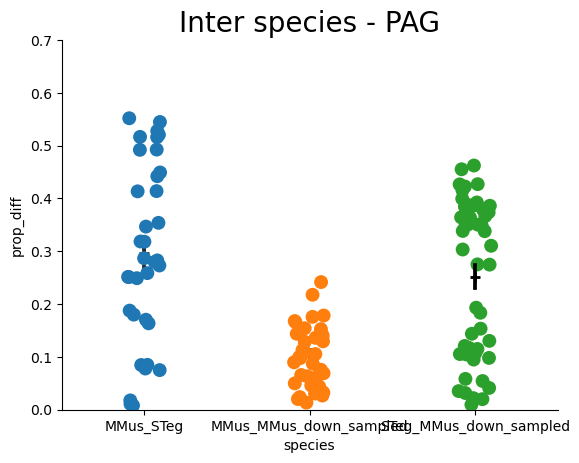

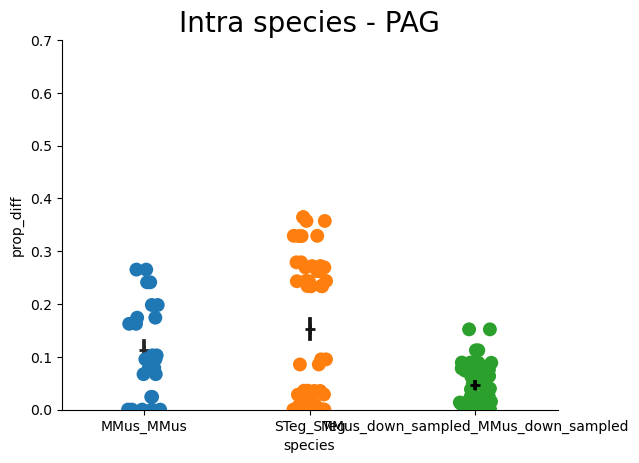

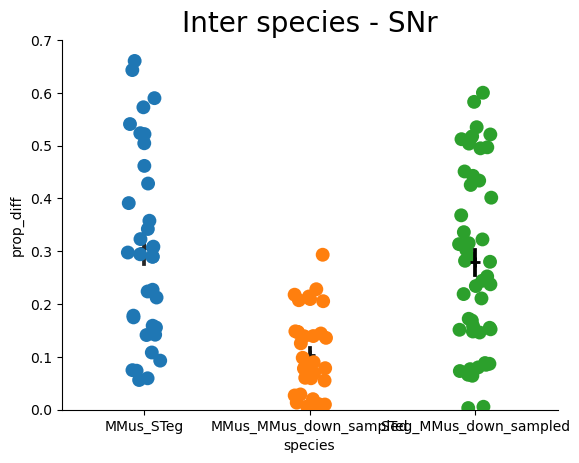

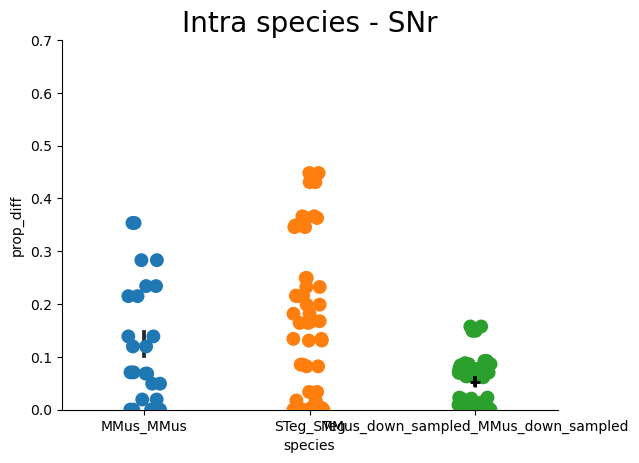

In [90]:
d1 = proportion_comparisons(plot_pt, species1="MMus", species2="STeg", label="inter")
d2 = proportion_comparisons(plot_pt, species1="MMus", species2="MMus_down_sampled", label="inter")
d3 = proportion_comparisons(plot_pt, species1="STeg", species2="MMus_down_sampled", label="inter")
d4 = proportion_comparisons(plot_pt, species1="MMus", species2="MMus", label="intra")
d5 = proportion_comparisons(plot_pt, species1="STeg", species2="STeg", label="intra")
d6 = proportion_comparisons(plot_pt, species1="MMus_down_sampled", species2="MMus_down_sampled", label="intra")

result_pt = pd.concat([d1, d2, d3, d4, d5, d6])

inter = result_pt[result_pt['label']=="inter"]
intra = result_pt[result_pt['label']=="intra"]



f1 = area_proportion_dot_plot(inter, "PAG", title="Inter species - PAG", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)
f3 = area_proportion_dot_plot(intra, "PAG", title="Intra species - PAG", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)
f2 = area_proportion_dot_plot(inter, "SNr", title="Inter species - SNr", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)
f4 = area_proportion_dot_plot(intra, "SNr", title="Intra species - SNr", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)

plt.show()


/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_1267/4221558939.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_means = result.groupby(['label', 'area']).mean().reset_index()


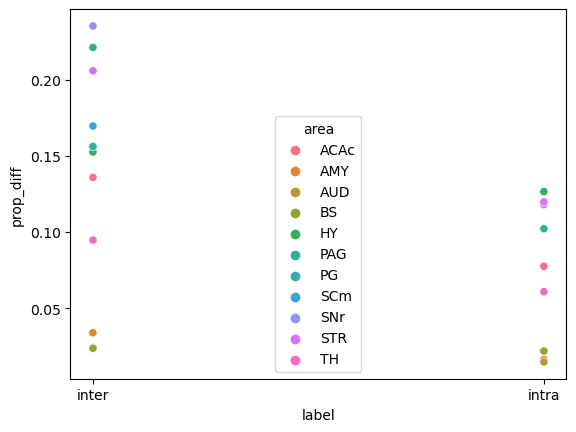

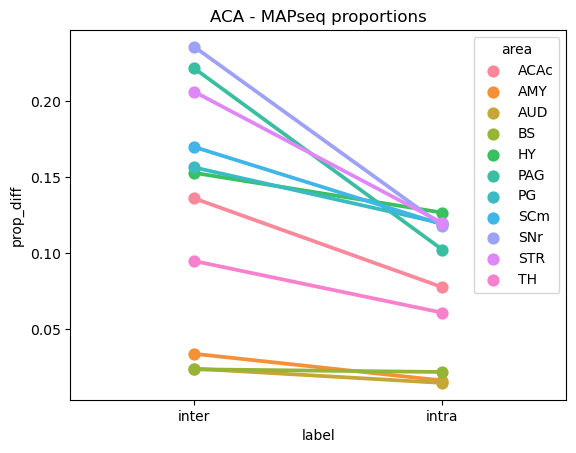

In [100]:
# drop str in result_pt so no repeat areas b/w it and pt
result_pt = result_pt[result_pt['area']!="STR"]

result = pd.concat([result_it, result_pt])

# inter = result[result['label']=="inter"]
# intra = result[result['label']=="intra"]

result_means = result.groupby(['label', 'area']).mean().reset_index()
result_means

sns.scatterplot(result_means, x='label', y="prop_diff", hue="area")
# plt.scatter(result_means['label'], result_means['prop_diff'])
plt.show()

sns.pointplot(result_means, x="label", y="prop_diff", hue="area")
plt.title("ACA - MAPseq proportions")
plt.show()

# Volcano Plots

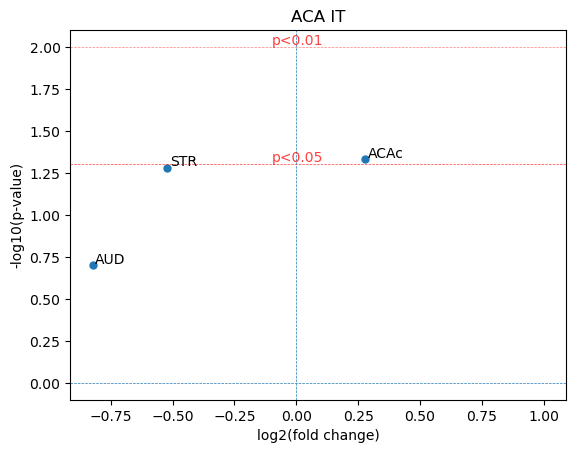

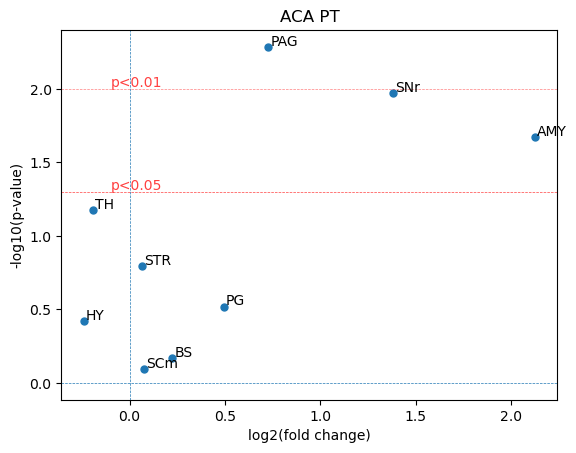

In [92]:
# IT
acc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in acc_type]
plot_df = dfs_to_proportions(acc_it, cell_type="IT", drop=["ACAi", "type"], inj_site="ACAi")
vplot_df = proportion_ttest(plot_df)
proportion_volcano_plot(vplot_df, title="ACA IT")
plt.show()

# PT
acc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in acc_type]
plot_df = dfs_to_proportions(acc_pt, cell_type="PT", drop=["ACAi", "type"], inj_site="ACAi")
vplot_df = proportion_ttest(plot_df)
proportion_volcano_plot(vplot_df, title="ACA PT")
plt.show()

# Scatterplots

In [93]:
acc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in acc_type]
acc_it_prop = dfs_to_proportions(acc_it, cell_type="IT", drop=["ACAi", "type"], inj_site="ACAi")
acc_pt = [df[df["type"]=="PT"].drop(["type", "STR"], axis=1) for df in acc_type]
acc_pt_prop = dfs_to_proportions(acc_pt, cell_type="PT", drop=["ACAi", "type"], inj_site="ACAi")
acc_pt_prop

,area,proportion,mice,species,dataset
0,TH,0.893745,MMM1,MMus,M194
1,HY,0.932931,MMM1,MMus,M194
2,AMY,0.007536,MMM1,MMus,M194
3,SNr,0.116051,MMM1,MMus,M194
4,SCm,0.541070,MMM1,MMus,M194
...,...,...,...,...,...
3,SNr,0.688581,STM7,STeg,M220
4,SCm,0.806228,STM7,STeg,M220
5,PG,0.228374,STM7,STeg,M220
6,PAG,0.878893,STM7,STeg,M220


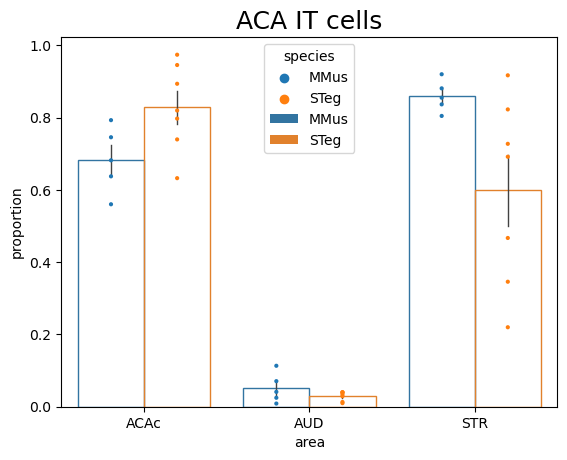

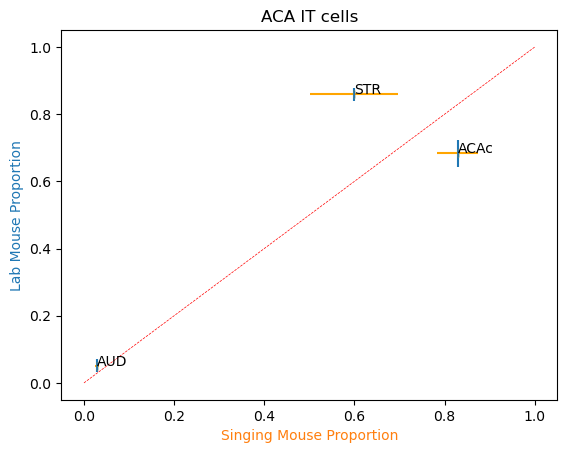

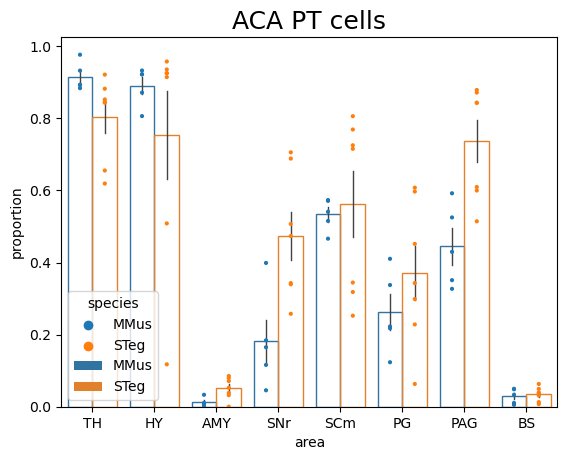

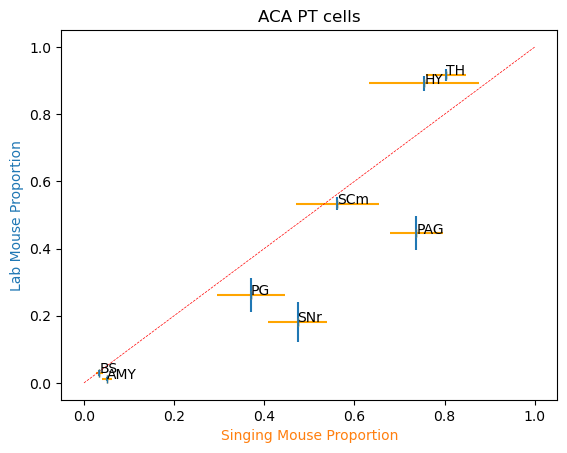

In [94]:
dot_bar_plot(acc_it_prop, title="ACA IT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()
stvmm_area_scatter(acc_it_prop, title="ACA IT cells")
plt.show()

dot_bar_plot(acc_pt_prop, title="ACA PT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()
stvmm_area_scatter(acc_pt_prop, title="ACA PT cells")
plt.show()

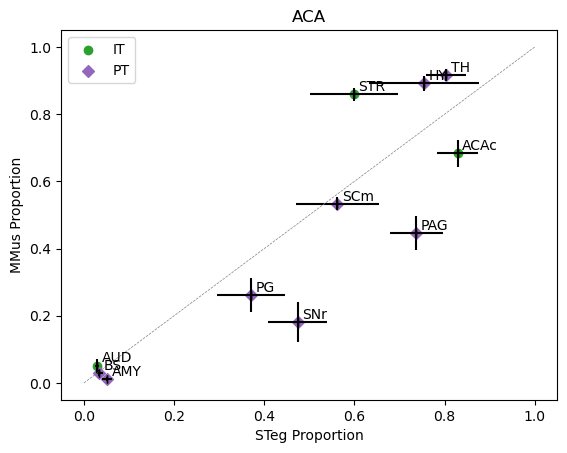

In [96]:
# combine IT and PT

acc_it_prop['type'] = "IT"
acc_pt_prop['type'] = "PT"

sp_stats_it = stvmm_calc_stats(acc_it_prop)
# sp_stats_it['type'] = "IT"
sp_stats_pt = stvmm_calc_stats(acc_pt_prop)
# sp_stats_pt['type'] = "PT"

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])

stvmm_area_scatter_type(sp_stats, title="ACA")
# plt.savefig(out_path+"ACA_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

## volcano plot

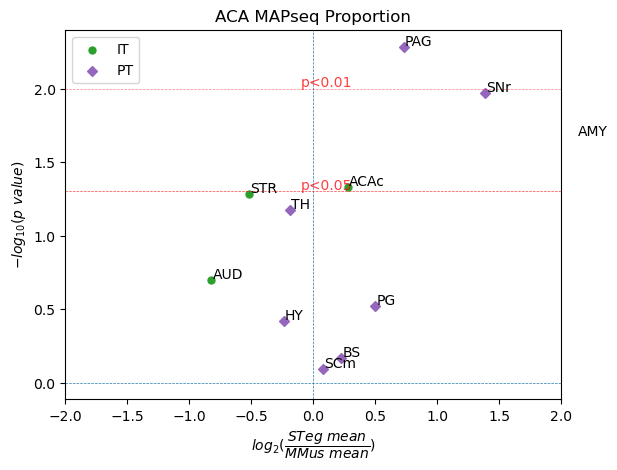

In [98]:
# # acc_it_prop['type'] = "IT"
# acc_pt_prop['type'] = "PT"

acc_prop = pd.concat([acc_it_prop, acc_pt_prop])
plot = stvmm_calc_ttest(acc_prop)
plot
plot_volcano(plot, title="ACA MAPseq Proportion", shape="type")
plt.xlim(-2,2)


plt.savefig(out_path+"ACA.svg", dpi=300, bbox_inches="tight")


# compare number of cells

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


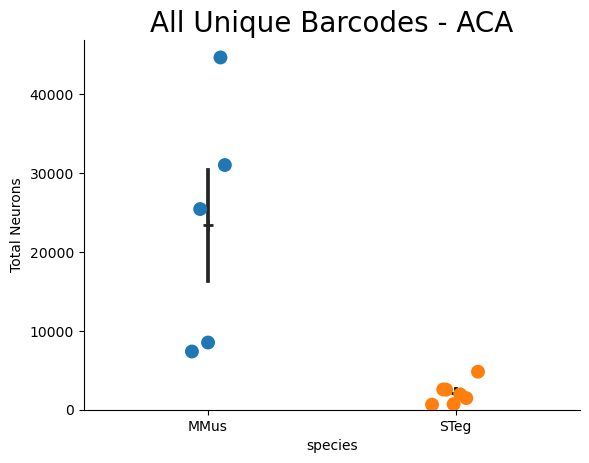

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


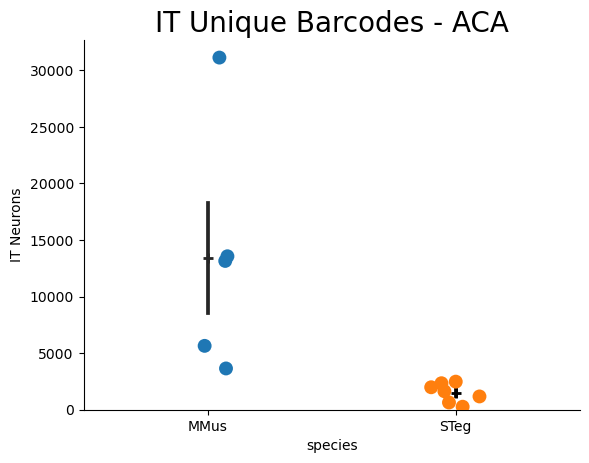

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


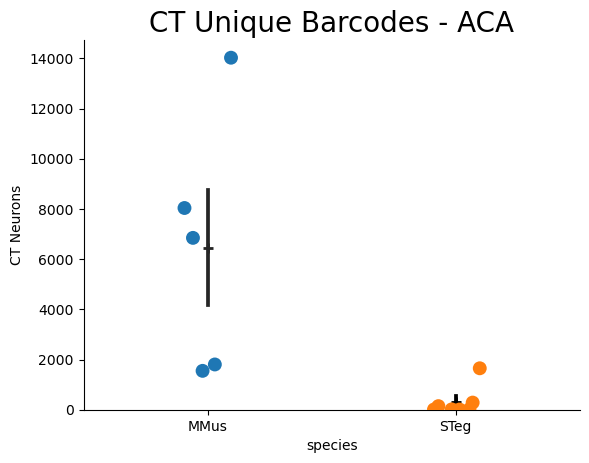

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


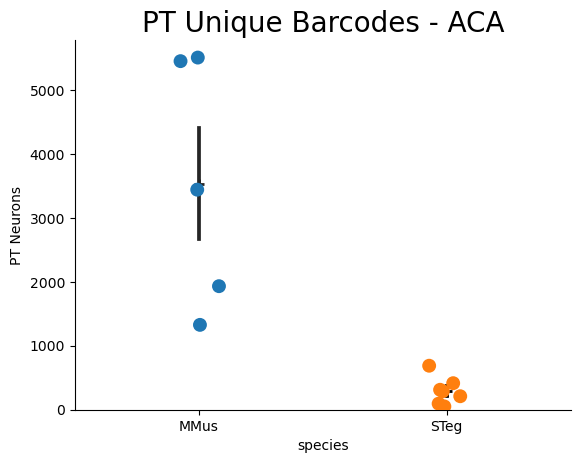

In [5]:
# make dataframe w/ # unique barcodes per animal

nBC_df = pd.DataFrame(columns=["Total Neurons", "IT Neurons", "CT Neurons", "PT Neurons",
                               "mice", "species", "dataset"])

for i in range(metadata.shape[0]):
    df = acc_preprocess[i]
    tot = df.shape[0]
    it = df[df['type']=="IT"].shape[0]
    ct = df[df['type']=="CT"].shape[0]
    pt = df[df['type']=="PT"].shape[0]

    row = [tot, it, ct, pt, metadata.loc[i,"mice"], metadata.loc[i,"species"], metadata.loc[i,"dataset"]]

    nBC_df.loc[i] = row

nBC_df
area_proportion_dot_plot(nBC_df, title="All Unique Barcodes - ACA",
                         to_plot="Total Neurons", add_legend=False)
plt.show()

area_proportion_dot_plot(nBC_df, title="IT Unique Barcodes - ACA",
                         to_plot="IT Neurons", add_legend=False)
plt.show()

area_proportion_dot_plot(nBC_df, title="CT Unique Barcodes - ACA",
                         to_plot="CT Neurons", add_legend=False)
plt.show()

area_proportion_dot_plot(nBC_df, title="PT Unique Barcodes - ACA",
                         to_plot="PT Neurons", add_legend=False)
plt.show()

